## Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("housing_dataset.csv")

In [3]:
X = data.drop("median_house_value", axis=1)   # independent variables
y = data["median_house_value"]                # target variable

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
dt_reg = DecisionTreeRegressor(
    criterion="squared_error",
    max_depth=5,
    random_state=42
)

In [6]:
dt_reg.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [7]:
y_pred = dt_reg.predict(X_test)

In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 5736786610.244647
R² Score: 0.5444653521065757


## Classification

In [9]:
data["price_class"] = np.where(
    data["median_house_value"] >= data["median_house_value"].median(),
    1, 0
)

In [10]:
X = data.drop(["median_house_value", "price_class"], axis=1)
y = data["price_class"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(
    criterion="gini",   # or "entropy"
    max_depth=5,
    random_state=42
)

In [13]:
dt_clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
y_pred = dt_clf.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)

Accuracy: 0.77
Confusion Matrix:
 [[229  81]
 [ 57 233]]


### 1. What is the RMSE / R² score?
#### R2 score = 0.5444
#### RMSE = 75,739
### 2. What happens when you increase the max_depth of the tree?
#### Increasing max_depth improves training accuracy but increases the risk of overfitting.
### 3. Which features appear at the top of the tree, and why?
1.	median_income
2.	latitude
3.	longitude
4.	housing_median_age

Reason:

•	Decision Trees select features that give maximum reduction in MSE

•	median_income has the strongest influence on house prices

•	Location features capture regional price variations

### 4. Is the model overfitting or underfitting? How do you know?
#### Accuracy = 77% - Model is not highly accurate


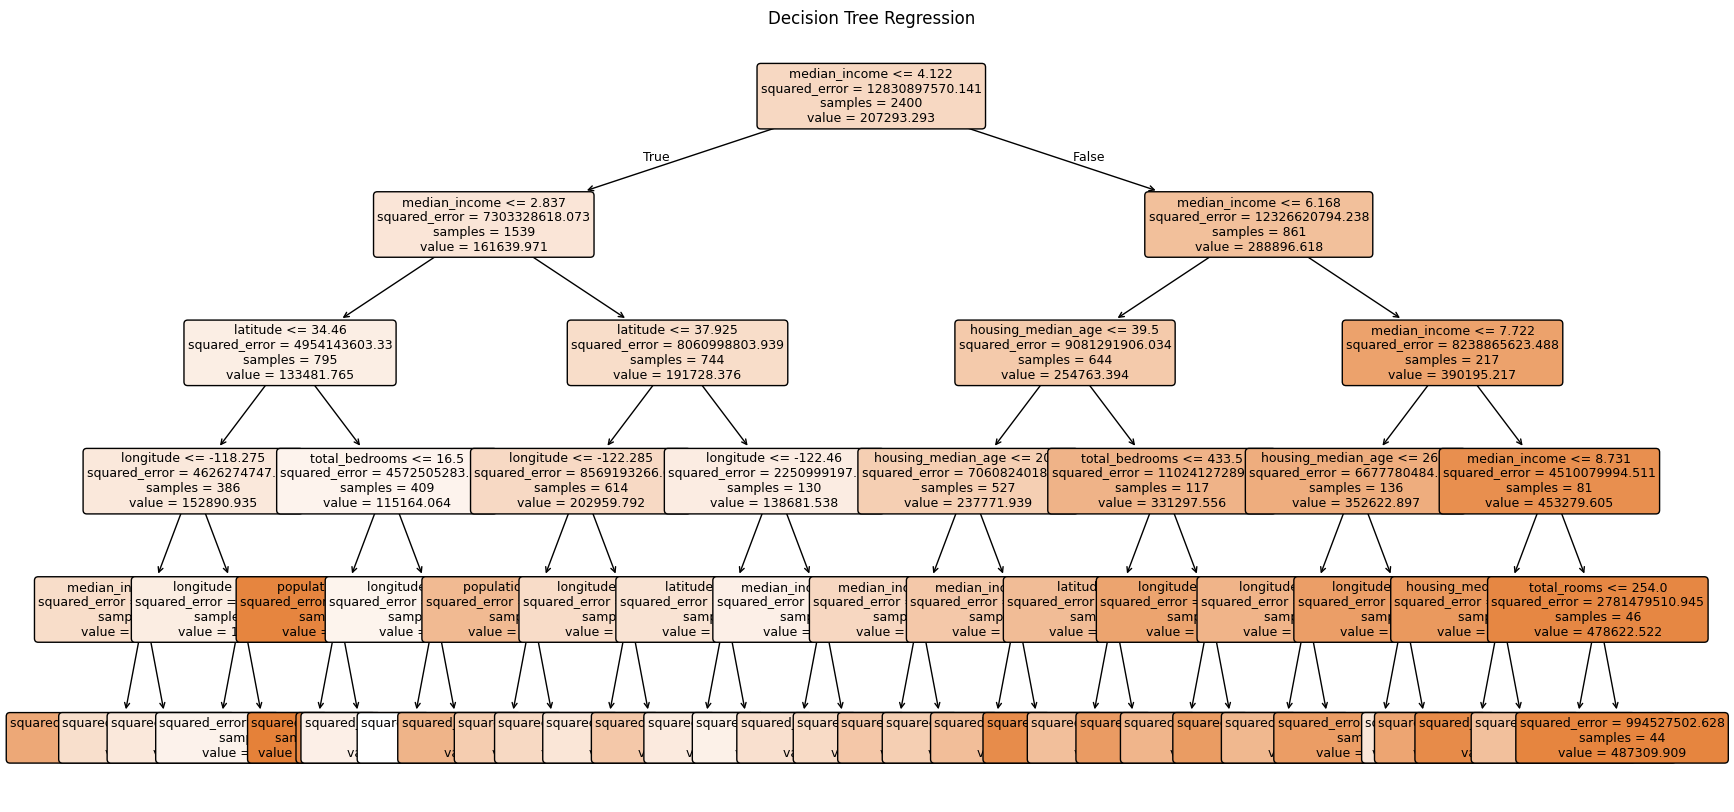

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plot_tree(
    dt_reg,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=9
)

plt.title("Decision Tree Regression")
plt.show()

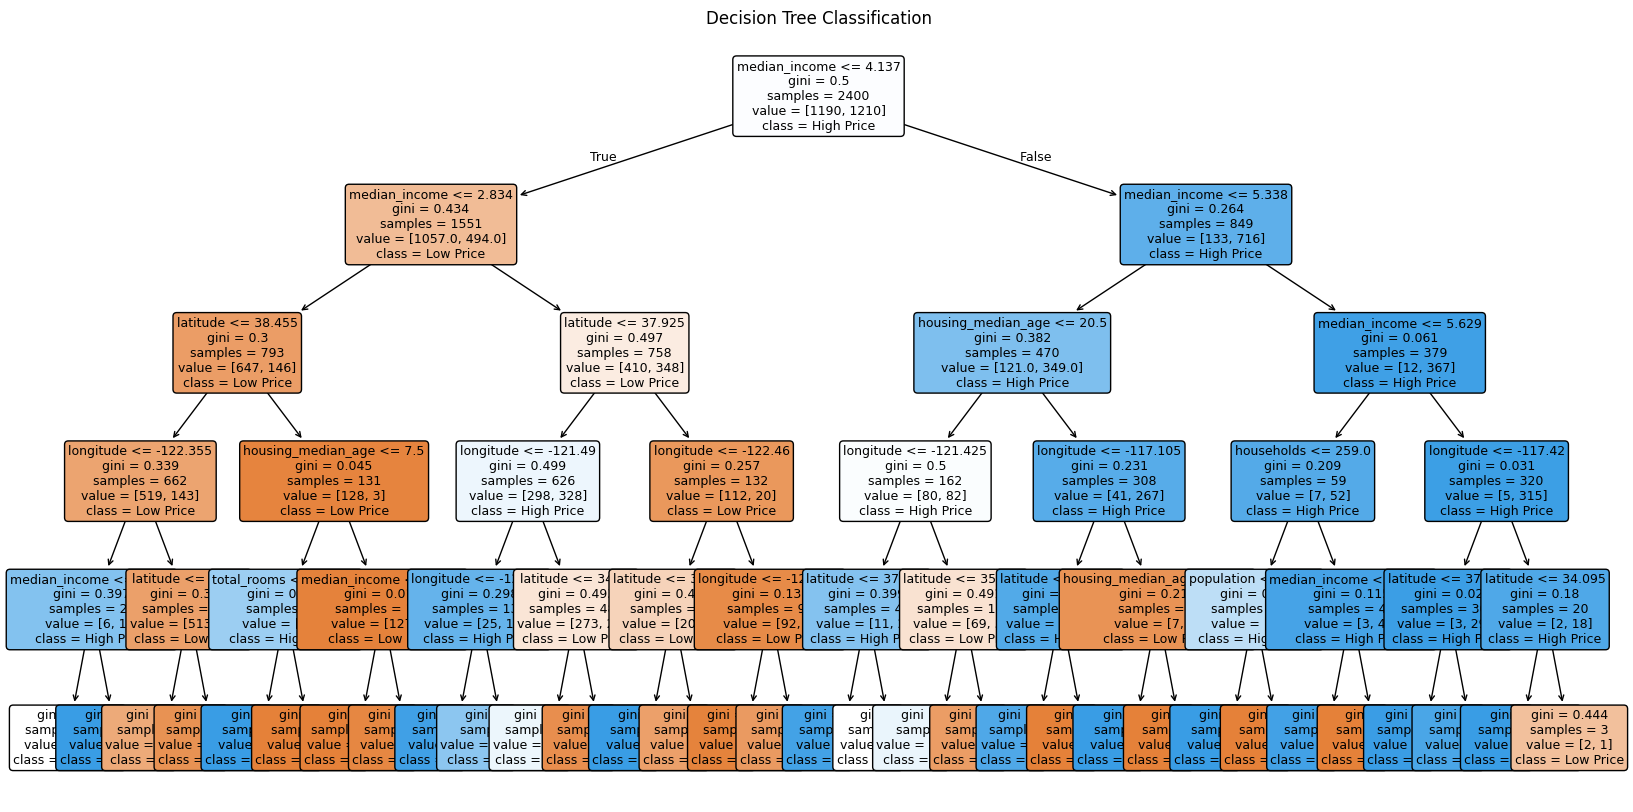

In [17]:
plt.figure(figsize=(20, 10))

plot_tree(
    dt_clf,
    feature_names=X.columns,
    class_names=["Low Price", "High Price"],
    filled=True,
    rounded=True,
    fontsize=9
)

plt.title("Decision Tree Classification")
plt.show()

### 1.Regression models are evaluated using MAE, MSE, RMSE, and R².
### 2.classification models are evaluated using Accuracy, Precision, Recall, F1-score, and ROC-AUC.